### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

- 自变量：显示的文字与打印颜色是否匹配。
- 因变量：答题者说出同等大小列表中的墨色名称花费的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

- **该任务建议使用双侧备择假设合适，因为我们想知道显示文字与打印颜色不匹配是提升还是阻碍了答题花费的时间。**
- H0:不一致文字条件不会影响判断文字颜色时间。（μ-μi=0）
- Ha:不一致文字条件会影响判断文字颜色时间。（μ-μi≠0）
- μ： 显示的文字与打印颜色一致花费的时间的平均值
- μi：显示的文字与打印颜色不一致花费的时间的平均值
- **这里两个μ代表的是总体均值，虽然我们只有样本数据，但是接下来会通过假设检验，来判断总体的情况。**
- 执行配对样本t检验(重复衡量设计)，因为每个测试者会经历两组实验给出两个测量值，这两个测试值可以认为是相依赖的，因为来自同一个测试者。并且因为我们的样本量较小，不足以认为是总体的数据，所以应使用t检验。
- 该检验的前提条件也都符合，分别是1.来自正太分布总体；2.都是随机抽样的数据；3.两组数据的总体方差相等

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [4]:
# 在这里执行你的分析
import numpy

my_data = numpy.genfromtxt('stroopdata.csv', delimiter=',',skip_header =1)
Congruent_data = my_data[:, 0]
Incongruent_data = my_data[:, 1]
Md1=numpy.mean(Congruent_data)
Sd1=numpy.std(Congruent_data, ddof=1)
Md2=numpy.mean(Incongruent_data)
Sd2=numpy.std(Incongruent_data, ddof=1)
print('Md: {}'.format(Md1))
print('Sd: {}'.format(Sd1))
print('Md: {}'.format(Md2))
print('Sd: {}'.format(Sd2))

Md: 14.051124999999999
Sd: 3.559357957645195
Md: 22.01591666666667
Sd: 4.797057122469138


### 一致文字条件下
- 均值（中心性测量）：14.051
- 标准差（可变性测量）：3.559

### 不一致文字条件下
- 均值（中心性测量）：22.016
- 标准差（可变性测量）：4.797

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

[12.079 16.791  9.564  8.63  14.669 12.238 14.692  8.987  9.401 14.48
 22.328 15.298 15.073 16.929 18.2   12.13  18.495 10.639 11.344 12.369
 12.944 14.233 19.71  16.004]


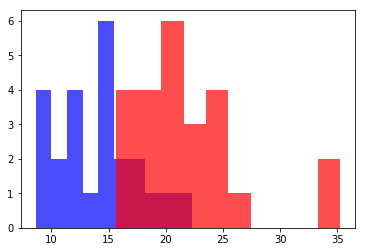

In [10]:
import matplotlib.pyplot as plt

plt.hist(Congruent_data, facecolor="blue", alpha=0.7)
plt.hist(Incongruent_data, facecolor="red", alpha=0.7)
plt.show()

从图中看出，一致文字条件数据整体数据分布更靠坐（最多的是15s左右），而另一组数据更靠右边（更集中在21或者22左右）。这也意味着，一定程度上，显示文字与打印颜色一致时答题者耗时更短些；反之，显示文字与打印颜色不一致时，答题者耗时要更长。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [6]:
# 在这里执行你的分析
import numpy

my_data = numpy.genfromtxt('stroopdata.csv', delimiter=',',skip_header =1)
Congruent_data = my_data[:, 0]
Incongruent_data = my_data[:, 1]
D=Congruent_data-Incongruent_data
n=len(D)
Md=numpy.mean(D)
Sd=numpy.std(Congruent_data-Incongruent_data, ddof=1)
Se=Sd/numpy.sqrt(n)
t=Md/Se
t_cv=2.069 # 查表获得
cohens_d=Md/Sd
CI_ll=Md-t_cv*Se
CI_ul=Md+t_cv*Se
print('n: {}'.format(n))
print('Md: {}'.format(Md))
print('Sd: {}'.format(Sd))
print('Se: {}'.format(Se))
print('t: {}'.format(t))
print('cohens_d: {}'.format(cohens_d))
print('CI: ({},{})'.format(CI_ll,CI_ul))

n: 24
Md: -7.964791666666666
Sd: 4.864826910359054
Se: 0.9930286347783402
t: -8.020706944109959
cohens_d: -1.637219949122263
CI: (-10.019367912023052,-5.91021542131028)


- 相依样本差的均值Md：-7.965
- 差异的标准偏差Sd：4.865
- 差异的标准误差Se：0.993
- t统计量：-8.021
- t临界值：±2.069；α=0.05水准
- cohen‘s d：-1.637
- 相依样本的置信区间：（-10.019，-5.910）；也就说显示的文字与打印颜色一致花费的时间的平均时间比不一致要短5到10秒。

### 结论：
- α=0.05水准下，t临界值为±2.069，实际t统计量为-8.021。
- 因为-8.021<-2.069,所以拒绝零假设，认为显示的文字与打印颜色会影响到答题者说出墨色需要花费的时间。
- 另外，根据计算，p值小于等于0.0001。因为p<α,所以也可以得出拒绝零假设的结论。

### 参考链接：
> https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html   
https://blog.csdn.net/Gooooa/article/details/78923469   
https://stackoverflow.com/questions/10138085/python-pylab-plot-normal-distribution